# Michelson Interferometer

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
mpl.get_cachedir()
from scipy import asarray as ar, exp
import scipy
from scipy.signal import chirp, find_peaks, peak_widths
import scipy.optimize as opt
import matplotlib.mlab as mlab
from scipy.interpolate import UnivariateSpline

In [ ]:
Node = [9.05, 8.76, 8.47, 8.17, 7.88]

In [87]:
df = pd.read_csv('mic_data.csv')
print(df)

    antinode  sig_node  voltage  sig_v
0       7.45      0.05     0.52   0.01
1       7.73      0.05     0.62   0.01
2       8.03      0.05     0.86   0.01
3       8.33      0.05     0.90   0.01
4       8.61      0.05     1.22   0.01
5       8.90      0.05     1.32   0.01
6       9.19      0.05     1.90   0.01
7       9.48      0.05     2.94   0.01
8       9.78      0.05     2.18   0.01
9      10.07      0.05     1.58   0.01
10     10.36      0.05     1.18   0.01
11     10.65      0.05     1.00   0.01
12     10.95      0.05     0.98   0.01
13     11.24      0.05     0.74   0.01
14     11.53      0.05     0.60   0.01
15     11.82      0.05     0.56   0.01


In [101]:
data = []
df1 = df["voltage"]*1000
for rows in df.iterrows():
    for i in range((rows[1][2]*1000).astype(int)):
        data.append(rows[1][0])

In [102]:
print(data)

[7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.45, 7.4

In [142]:
x = df["antinode"]
y = df["voltage"]

In [145]:
X_Y_Spline=scipy.interpolate.make_interp_spline(df["antinode"], fitfunc(c, xdata),k=2 )

In [166]:
spline = UnivariateSpline(X_, X_Y_Spline(X_), s=0)
r1, r2 = spline.roots() # find the roots

ValueError: not enough values to unpack (expected 2, got 0)

<Figure size 432x288 with 0 Axes>

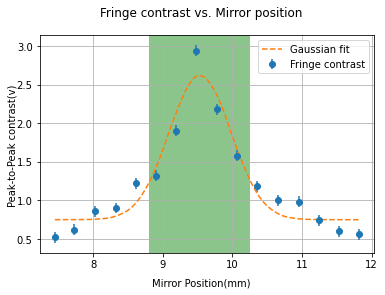

In [165]:


X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
xp = np.linspace(-1,1,1000)
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
fig.suptitle("Fringe contrast vs. Mirror position")
fig.text(0.5, 0.01, 'Mirror Position(mm)', ha='center')
fig.text(0.05, 0.5, 'Peak-to-Peak contrast(v)', va='center', rotation='vertical')
#plot current vs angle with linear fit line
ax1.axvspan(8.8, 10.25, facecolor='g', alpha=0.45)
ax1.errorbar(df["antinode"], df["voltage"], yerr=df["sig_v"]*7, fmt="o", label="Fringe contrast")
ax1.plot(X_, Y_, "--", label="Gaussian fit")
ax1.grid()
Leg = ax1.legend()

#fig.savefig("angle_current.png", dpi=500)

1.8683206462481197 9.535699276653169 0.4439937502362224 0.7495200306611118


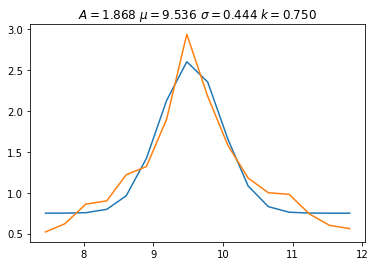

In [147]:
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq

fitfunc  = lambda p, x: p[0]*exp(-0.5*((x-p[1])/p[2])**2)+p[3]
errfunc  = lambda p, x, y: (y - fitfunc(p, x))

xdata    = df["antinode"]
ydata    = df["voltage"]

init  = [100, 100, 100, 100]

out   = leastsq(errfunc, init, args=(xdata, ydata))#  init, args=(xdata, ydata))
c = out[0]

print(c[0],c[1],abs(c[2]),c[3])

plot(xdata, fitfunc(c, xdata))
plot(xdata, ydata)

title(r'$A = %.3f\  \mu = %.3f\  \sigma = %.3f\ k = %.3f $' %(c[0],c[1],abs(c[2]),c[3]));

show()

In [118]:
print(fitfunc(c, xdata))

0     0.749550
1     0.749998
2     0.755465
3     0.796308
4     0.962099
5     1.419873
6     2.129296
7     2.603197
8     2.355382
9     1.655225
10    1.082935
11    0.829633
12    0.761218
13    0.750700
14    0.749598
15    0.749523
Name: antinode, dtype: float64


In [125]:
from scipy.signal import chirp, find_peaks, peak_widths
import matplotlib.pyplot as plt

In [159]:
print(fitfunc(c, xdata))

0     0.749550
1     0.749998
2     0.755465
3     0.796308
4     0.962099
5     1.419873
6     2.129296
7     2.603197
8     2.355382
9     1.655225
10    1.082935
11    0.829633
12    0.761218
13    0.750700
14    0.749598
15    0.749523
Name: antinode, dtype: float64


In [154]:
peaks, _ = find_peaks(fitfunc(c, xdata))
results_half = peak_widths(fitfunc(c, xdata), peaks, rel_height=0.5)
results_full = peak_widths(fitfunc(c, xdata), peaks, rel_height=1)

In [155]:
results_half[0] 

array([3.60823231])

In [156]:
results_full[0]

array([14.63911086])

In [157]:
print(X_)

[ 7.45        7.45875752  7.46751503  7.47627255  7.48503006  7.49378758
  7.50254509  7.51130261  7.52006012  7.52881764  7.53757515  7.54633267
  7.55509018  7.5638477   7.57260521  7.58136273  7.59012024  7.59887776
  7.60763527  7.61639279  7.6251503   7.63390782  7.64266533  7.65142285
  7.66018036  7.66893788  7.67769539  7.68645291  7.69521042  7.70396794
  7.71272545  7.72148297  7.73024048  7.738998    7.74775551  7.75651303
  7.76527054  7.77402806  7.78278557  7.79154309  7.8003006   7.80905812
  7.81781563  7.82657315  7.83533066  7.84408818  7.85284569  7.86160321
  7.87036072  7.87911824  7.88787575  7.89663327  7.90539078  7.9141483
  7.92290581  7.93166333  7.94042084  7.94917836  7.95793587  7.96669339
  7.9754509   7.98420842  7.99296593  8.00172345  8.01048096  8.01923848
  8.02799599  8.03675351  8.04551102  8.05426854  8.06302605  8.07178357
  8.08054108  8.0892986   8.09805611  8.10681363  8.11557114  8.12432866
  8.13308617  8.14184369  8.1506012   8.15935872  8.

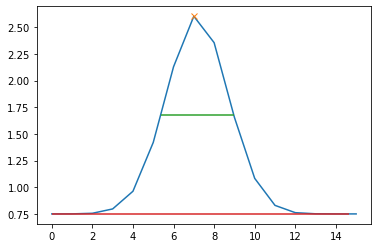

In [161]:
plt.plot(fitfunc(c, xdata))
plt.plot(peaks, fitfunc(c, xdata)[peaks], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()